In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from amftrack.pipeline.functions.post_processing.area_hulls import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
directory_targ = directory_project

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/3431 [00:00<?, ?it/s]

In [3]:
plates = ['1048_20220506','1045_20220504','52_20220707','84_20220621']
# plates = ['1048_20220506','1045_20220504','84_20220621']
strain = ['C2','C2','A5','A5']
select = all_folders.loc[all_folders['unique_id'].isin(plates)]
# select = all_folders.loc[all_folders['unique_id']=='1045_20220504']

select = select.loc[select['/Analysis/skeleton_compressed.mat']==True]

select = select.sort_values(by='datetime',ascending=True)

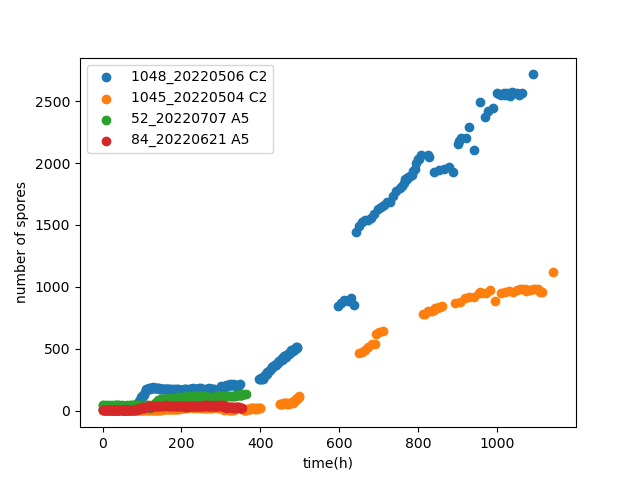

In [11]:
fig,ax = plt.subplots()
for j,plate in enumerate(plates):
    table = select.loc[select['unique_id']==plate]
    table = table.sort_values(by='datetime',ascending=True)
    num_spore = []
    tot_spore_volume = []
    for i in range(len(table)):
        path = table['total_path'].iloc[i]
        spore_data = sio.loadmat(os.path.join(path,'Analysis','spores.mat'))['spores']
        num_spore.append(len(spore_data))
        tot_spore_volume.append(np.sum(4/3*np.pi*(spore_data[:,2]*1.725)**3))
    ax.scatter((table['datetime']-table['datetime'].iloc[0])/pd.Timedelta('1h'),num_spore,label=f'{plate} {strain[j]}')
ax.set_xlabel('time(h)')
ax.set_ylabel('number of spores')
plt.legend()

In [8]:

analysis_info = get_analysis_info(directory_targ)

In [13]:
analysis_info.loc[analysis_info['Plate']=='1048']

,folder_analysis,version,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,...,datetime,date_begin,date_end,number_timepoints,path_exp,path_global_hypha_info,path_time_hypha_info,path_time_plate_info,path_global_plate_info,date_run_analysis
13,Analysis_1048_20220506_200_Version1,Version1,/projects/0/einf914/data/20220506_2350_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',...,2022-05-06 23:50:00,"06.05.2022, 23:50:","26.05.2022, 15:38:",200,Analysis_1048_20220506_200_Version1/experiment...,Analysis_1048_20220506_200_Version1/global_hyp...,Analysis_1048_20220506_200_Version1/time_hypha...,Analysis_1048_20220506_200_Version1/time_plate...,Analysis_1048_20220506_200_Version1/global_pla...,"01.01.1970, 01:00:"


ValueError: x and y must be the same size

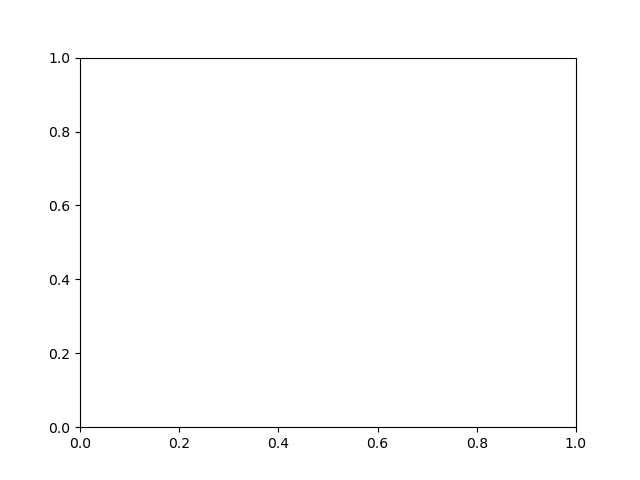

In [6]:
fig,ax = plt.subplots()
ax.scatter((select['datetime']-select['datetime'].iloc[0])/pd.Timedelta('1h'),num_spore)
ax.set_xlabel('time(h)')
ax.set_ylabel('number of spores')

In [ ]:
fig,ax = plt.subplots()
ax.scatter((select['datetime']-select['datetime'].iloc[0])/pd.Timedelta('1h'),tot_spore_volume)
ax.set_xlabel('time(h)')
ax.set_ylabel('total volume of spores ($\mu m^3$)')

In [ ]:
spore_volumes_array = np.array(tot_spore_volume)
d_biomass = 1100 #kg.m-3
d_biomass = d_biomass*1e-18 #kg.um-3
d_biomass = d_biomass*1e6 #mg.um-3

m_wet = spore_volumes_array * d_biomass
r_dw=0.3
m_dry = m_wet*r_dw

In [ ]:
fig,ax = plt.subplots()
ax.scatter((select['datetime']-select['datetime'].iloc[0])/pd.Timedelta('1h'),m_dry)
ax.set_xlabel('time(h)')
ax.set_ylabel('total dry mass of spores ($mg$)')